In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr
import datetime as dt
from tqdm import tqdm_notebook

In [2]:
# 마이너스 깨짐 설정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

# 지수 표현 설정
pd.options.display.float_format = '{:.5f}'.format

### 데이터 불러오기

In [57]:
youtube = pd.read_csv('국제유가_조회수순.csv')
youtube.head(3)

,viewCount,likeCount,favoriteCount,commentCount,key,title,channel,url,date
0,1773801,11583.00000,0,3050.00000,국제유가,밤사이 국제유가 &#39;폭락&#39;‥WTI 100달러 붕괴 (2022.07.06...,MBCNEWS,https://www.youtube.com/watch?v=vnl2xFjWUz8,2022-07-06
1,786038,4538.00000,0,386.00000,국제유가,국제유가를 흔들 수 있는 원유매장량이 많은 나라들,보통남자,https://www.youtube.com/watch?v=_LD-qsg_R9I,2021-06-11
2,530700,2981.00000,0,3329.00000,국제유가,국제유가 떨어질 때도…기름값은 40일째 &#39;요지부동&#39; / JTBC 뉴스룸,JTBC News,https://www.youtube.com/watch?v=GcHEOZiW-sA,2022-06-14


In [5]:
stock_list = pd.DataFrame({'name': ['SK','S-Oil','HD현대','GS','LX인터내셔널'], 'Ticker' :['096770','010950','267250','078930','001120']})

In [6]:
stock_change = pd.DataFrame()
stock_close = pd.DataFrame()
stock_volume = pd.DataFrame()
for i in range(stock_list.shape[0]):
    stock = fdr.DataReader(stock_list.Ticker[i], start='2020-01-01', end='2022-12-31')[['Close','Change','Volume']].reset_index()
    stock_close[stock_list.name[i]] = stock['Close']
    stock_change[stock_list.name[i]] = stock['Change']
    stock_volume[stock_list.name[i]] = stock['Volume']
stock_close.set_index(stock['Date'], inplace=True)
stock_change.set_index(stock['Date'], inplace=True)
stock_volume.set_index(stock['Date'], inplace=True)

In [7]:
stock_close.head(3)

,SK,S-Oil,HD현대,GS,LX인터내셔널
Date,,,,,
2020-01-02,146500,91900,66000,50000,15000
2020-01-03,149500,93500,66200,50300,15050
2020-01-06,148000,93400,64700,50100,14600


In [8]:
stock_change.head(3)

,SK,S-Oil,HD현대,GS,LX인터내셔널
Date,,,,,
2020-01-02,-0.02333,-0.03568,-0.02367,-0.03101,-0.00332
2020-01-03,0.02048,0.01741,0.00303,0.00600,0.00333
2020-01-06,-0.01003,-0.00107,-0.02266,-0.00398,-0.02990


In [9]:
stock_volume.head(3)

,SK,S-Oil,HD현대,GS,LX인터내셔널
Date,,,,,
2020-01-02,217016,250460,57660,143431,155495
2020-01-03,274987,307012,29675,126085,158707
2020-01-06,317436,385159,33387,154646,158442


### 데이터 확인

In [10]:
youtube.info()
# likeCount, commentCount - 결측치 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   viewCount      536 non-null    int64  
 1   likeCount      532 non-null    float64
 2   favoriteCount  536 non-null    int64  
 3   commentCount   526 non-null    float64
 4   key            536 non-null    object 
 5   title          536 non-null    object 
 6   channel        536 non-null    object 
 7   url            536 non-null    object 
 8   date           536 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.8+ KB


In [11]:
stock_close.info() # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2020-01-02 to 2022-12-29
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   SK       742 non-null    int64
 1   S-Oil    742 non-null    int64
 2   HD현대     742 non-null    int64
 3   GS       742 non-null    int64
 4   LX인터내셔널  742 non-null    int64
dtypes: int64(5)
memory usage: 34.8 KB


In [12]:
stock_change.info() # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2020-01-02 to 2022-12-29
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SK       742 non-null    float64
 1   S-Oil    742 non-null    float64
 2   HD현대     742 non-null    float64
 3   GS       742 non-null    float64
 4   LX인터내셔널  742 non-null    float64
dtypes: float64(5)
memory usage: 34.8 KB


In [13]:
stock_volume.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2020-01-02 to 2022-12-29
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   SK       742 non-null    int64
 1   S-Oil    742 non-null    int64
 2   HD현대     742 non-null    int64
 3   GS       742 non-null    int64
 4   LX인터내셔널  742 non-null    int64
dtypes: int64(5)
memory usage: 34.8 KB


### 결측치 처리

In [14]:
youtube.isnull().sum()

viewCount         0
likeCount         4
favoriteCount     0
commentCount     10
key               0
title             0
channel           0
url               0
date              0
dtype: int64

In [15]:
youtube[youtube['likeCount'].isnull()]
# likeCount만 사용 , favoriteCount-> 모두 0 

,viewCount,likeCount,favoriteCount,commentCount,key,title,channel,url,date
18,42394,NaN,0,292.00000,국제유가,국제유가 마이너스 폭락 냉철의 대응전략은?,냉철tv,https://www.youtube.com/watch?v=N1KwgOIsO4U,2020-04-22
129,2183,NaN,0,2.00000,국제유가,기름값 한 달째 상승..국제유가 상승 원인/대전MBC,대전MBC 뉴스/Daejeon MBC News,https://www.youtube.com/watch?v=SI6A_LTuVpA,2020-12-14
444,397,NaN,0,2.00000,국제유가,주식언제사나요? 킹갓제너럴달러 &amp; 국제유가 WTI,현달이TV,https://www.youtube.com/watch?v=M7URPZemjq8,2022-11-07
490,1020,NaN,0,16.00000,국제유가,[미주놀] 국제 유가 $300까지 간다는 말이 현실화되는 현실✔️푸틴의 적수가 되지...,미주놀 - 미국주식 투자의 전설이 되어가다,https://www.youtube.com/watch?v=FK8OFVo62NU,2022-07-15


In [16]:
# likeCount 컬럼 drop
youtube.drop('favoriteCount',axis=1,inplace=True)
youtube.head(1)

,viewCount,likeCount,commentCount,key,title,channel,url,date
0,1773801,11583.00000,3050.00000,국제유가,밤사이 국제유가 &#39;폭락&#39;‥WTI 100달러 붕괴 (2022.07.06...,MBCNEWS,https://www.youtube.com/watch?v=vnl2xFjWUz8,2022-07-06


In [17]:
youtube[youtube['commentCount'].isnull()]
# 대부분 댓글 사용 중지된 영상 - 0개로 처리

,viewCount,likeCount,commentCount,key,title,channel,url,date
14,58731,2688.00000,NaN,국제유가,트럼프는 계획이 있었나? 국제유가 폭락이 유동성 폭발을 불러오나?,자유인awesome,https://www.youtube.com/watch?v=afs6iYuW8gw,2020-03-15
15,57633,2599.00000,NaN,국제유가,국제유가 100달러 시대 온다! 왜 부동산이 위험한가?,쇼킹부동산,https://www.youtube.com/watch?v=cuI0u1TPNo8,2022-01-27
25,31441,1495.00000,NaN,국제유가,국제유가 110불 시대가 왔습니다. 부동산은 어떻게 될까요?,쇼킹부동산,https://www.youtube.com/watch?v=9oocxnFta0g,2022-03-02
36,23864,1761.00000,NaN,국제유가,투기자본 나가는 국제유가 급락한다는 의견이 나오고있다,피셔인베스트,https://www.youtube.com/watch?v=vr19nd9RUvs,2022-06-23
44,21499,1465.00000,NaN,국제유가,국제유가 떨어지면 인플레이션도 끝난다 희망을 버리긴 아직...,피셔인베스트,https://www.youtube.com/watch?v=NpCESw7-iGk,2022-09-11
69,21499,1465.00000,NaN,국제유가,국제유가 떨어지면 인플레이션도 끝난다 희망을 버리긴 아직...,피셔인베스트,https://www.youtube.com/watch?v=NpCESw7-iGk,2022-09-11
237,29549,1919.00000,NaN,국제유가,OPEC+ 국제유가 담합에 미국이 정면으로 칼을 빼들었습니다( NOPEC),피셔인베스트,https://www.youtube.com/watch?v=D6bdvgq_RTw,2022-10-06
359,12587,915.00000,NaN,국제유가,국제유가 와 2007년 버핏의 에너지거품투자 코노코필립스 사건,피셔인베스트,https://www.youtube.com/watch?v=no-EKkZ6NGk,2022-10-11
369,23864,1761.00000,NaN,국제유가,투기자본 나가는 국제유가 급락한다는 의견이 나오고있다,피셔인베스트,https://www.youtube.com/watch?v=vr19nd9RUvs,2022-06-23
383,21058,1434.00000,NaN,국제유가,국제유가와 구리가격은 왜 반대로 갈까? 유가에 목숨걸어야하는 현실,피셔인베스트,https://www.youtube.com/watch?v=sSynR6sWWeU,2022-06-17


In [18]:
youtube = youtube.fillna(0)
youtube[youtube['commentCount'].isnull()] # 결측치 - 0으로 대체

,viewCount,likeCount,commentCount,key,title,channel,url,date


In [19]:
youtube['date'] = pd.to_datetime(youtube['date'])

In [20]:
# 일자별로 그룹화
youtube_date = youtube.groupby(by='date').sum()
youtube_date['num_video'] = youtube.groupby(by='date').size()
youtube_date = youtube_date[4:]

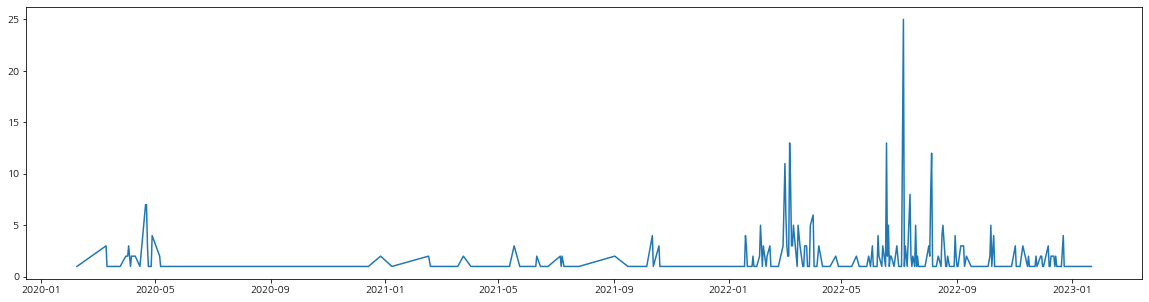

In [21]:
plt.figure(figsize=(20,5))
plt.plot(youtube_date['num_video'])
plt.show()

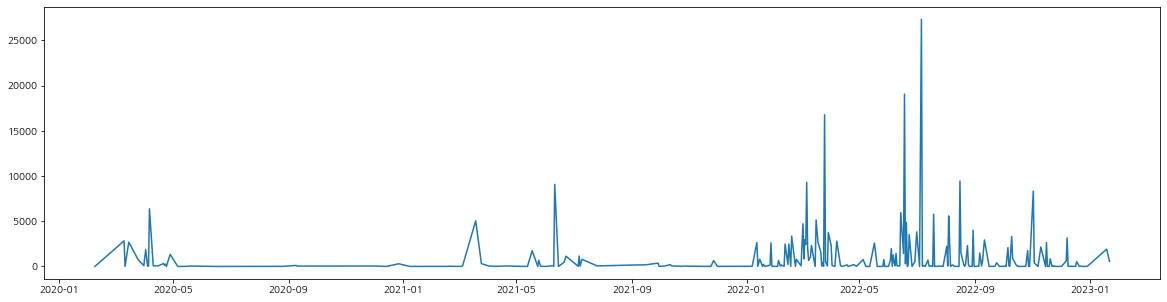

In [22]:
plt.figure(figsize=(20,5))
plt.plot(youtube_date['likeCount'])
plt.show()

### 유튜브 데이터 결측치 보간

- 주가 데이터를 기준으로 유튜브 데이터가 없는 날짜는 사람들의 관심도가 영상이 올라온 이후로 점차 선형적으로 증감한다고 가정하여 선형 보간법을 활용해 결측치 보간
  

In [23]:
import scipy.interpolate as spi

In [24]:
len(youtube_date) # 264일치 데이터

264

In [25]:
len(stock_close) # 742일치 데이터

742

In [26]:
youtube_date = youtube_date.reset_index()
youtube_date

,date,viewCount,likeCount,commentCount,num_video
0,2020-02-08,1142,3.00000,0.00000,1
1,2020-03-10,412647,2835.00000,484.00000,3
2,2020-03-11,109,3.00000,0.00000,1
3,2020-03-15,58731,2688.00000,0.00000,1
4,2020-03-25,28211,737.00000,46.00000,1
...,...,...,...,...,...
259,2022-12-28,319,5.00000,0.00000,1
260,2022-12-29,324,3.00000,0.00000,1
261,2022-12-31,41652,152.00000,177.00000,1
262,2023-01-19,38434,1916.00000,44.00000,1


In [27]:
youtube_date.rename(columns={'date':'Date'}, inplace=True)

In [28]:
stock_close = stock_close.reset_index() # 데이터 병합을 위해 날짜 데이터 열로 만들기

In [30]:
youtube_null = pd.merge(left=stock_close, right=youtube_date, how='left')[['Date','viewCount','likeCount','commentCount','num_video']]
youtube_null

,Date,viewCount,likeCount,commentCount,num_video
0,2020-01-02,NaN,NaN,NaN,NaN
1,2020-01-03,NaN,NaN,NaN,NaN
2,2020-01-06,NaN,NaN,NaN,NaN
3,2020-01-07,NaN,NaN,NaN,NaN
4,2020-01-08,NaN,NaN,NaN,NaN
...,...,...,...,...,...
737,2022-12-23,1226.00000,29.00000,2.00000,4.00000
738,2022-12-26,NaN,NaN,NaN,NaN
739,2022-12-27,NaN,NaN,NaN,NaN
740,2022-12-28,319.00000,5.00000,0.00000,1.00000


In [44]:
youtube_null[303:313]

,Date,viewCount,likeCount,commentCount,num_video
303,2021-03-25,46457.00000,314.00000,164.00000,2.00000
304,2021-03-26,NaN,NaN,NaN,NaN
305,2021-03-29,NaN,NaN,NaN,NaN
306,2021-03-30,NaN,NaN,NaN,NaN
307,2021-03-31,NaN,NaN,NaN,NaN
308,2021-04-01,NaN,NaN,NaN,NaN
309,2021-04-02,4322.00000,39.00000,14.00000,1.00000
310,2021-04-05,NaN,NaN,NaN,NaN
311,2021-04-06,NaN,NaN,NaN,NaN
312,2021-04-07,NaN,NaN,NaN,NaN


In [45]:
youtube_linear = youtube_null.interpolate()
youtube_linear[303:313] # 위 데이터와 비교했을 때 결측치가 평균값으로 채워진 것을 확인할 수 있음

,Date,viewCount,likeCount,commentCount,num_video
303,2021-03-25,46457.00000,314.00000,164.00000,2.00000
304,2021-03-26,39434.50000,268.16667,139.00000,1.83333
305,2021-03-29,32412.00000,222.33333,114.00000,1.66667
306,2021-03-30,25389.50000,176.50000,89.00000,1.50000
307,2021-03-31,18367.00000,130.66667,64.00000,1.33333
308,2021-04-01,11344.50000,84.83333,39.00000,1.16667
309,2021-04-02,4322.00000,39.00000,14.00000,1.00000
310,2021-04-05,3626.80000,34.00000,11.20000,1.00000
311,2021-04-06,2931.60000,29.00000,8.40000,1.00000
312,2021-04-07,2236.40000,24.00000,5.60000,1.00000


In [46]:
len(youtube_linear)

742

In [47]:
# 초기 데이터는 이전 데이터가 존재하지 않아 결측치 보간이 어렵기 때문에 제거하기로 함
youtube_linear = youtube_linear.dropna()
len(youtube_linear) # 36개 제거

696

### 최종 데이터

- 상관성 분석을 위해 주가 데이터와 유튜브 데이터 병합
- 유튜브 데이터의 경우 조회수,좋아요수,댓글수를 모두 합해 youtube_performance 변수 생성

In [49]:
youtube_linear['youtube_performance'] = youtube_linear.viewCount + youtube_linear.likeCount + youtube_linear.commentCount
youtube_linear = youtube_linear.drop(['viewCount','likeCount','commentCount'], axis=1)

In [50]:
youtube_change = pd.merge(left=stock_change, right=youtube_linear, how='inner', on='Date')
display(youtube_change.head(3))
print(len(youtube_change))

,Date,SK,S-Oil,HD현대,GS,LX인터내셔널,num_video,youtube_performance
0,2020-03-10,0.01413,0.05690,-0.01597,0.04799,-0.02857,3.00000,415966.00000
1,2020-03-11,-0.02488,0.01958,-0.00203,-0.00619,-0.01471,1.00000,112.00000
2,2020-03-12,-0.05714,-0.05600,-0.06504,-0.05106,-0.06965,1.00000,3000.20000


696


In [51]:
youtube_close = pd.merge(left=stock_close, right=youtube_linear, how='inner', on='Date')
display(youtube_close.head(3))
print(len(youtube_close))

,Date,SK,S-Oil,HD현대,GS,LX인터내셔널,num_video,youtube_performance
0,2020-03-10,100500,61300,49300,40400,10200,3.00000,415966.00000
1,2020-03-11,98000,62500,49200,40150,10050,1.00000,112.00000
2,2020-03-12,92400,59000,46000,38100,9350,1.00000,3000.20000


696


In [52]:
youtube_volume = pd.merge(left=stock_volume, right=youtube_linear, how='inner', on='Date')
display(youtube_volume.head(3))
print(len(youtube_volume))

,Date,SK,S-Oil,HD현대,GS,LX인터내셔널,num_video,youtube_performance
0,2020-03-10,1154291,1214591,120640,361388,465296,3.00000,415966.00000
1,2020-03-11,791383,677412,63010,262281,347446,1.00000,112.00000
2,2020-03-12,1006172,784837,96272,345886,502655,1.00000,3000.20000


696


### 상관성 분석

In [53]:
display(stock_change.corr())
display(stock_close.corr())
display(stock_volume.corr())

,SK,S-Oil,HD현대,GS,LX인터내셔널
SK,1.00000,0.47088,0.41144,0.45240,0.40882
S-Oil,0.47088,1.00000,0.64003,0.69976,0.48824
HD현대,0.41144,0.64003,1.00000,0.67339,0.52416
GS,0.45240,0.69976,0.67339,1.00000,0.45753
LX인터내셔널,0.40882,0.48824,0.52416,0.45753,1.00000


,SK,S-Oil,HD현대,GS,LX인터내셔널
SK,1.00000,0.64381,0.60464,0.35622,0.55622
S-Oil,0.64381,1.00000,0.74933,0.77962,0.75005
HD현대,0.60464,0.74933,1.00000,0.80904,0.59773
GS,0.35622,0.77962,0.80904,1.00000,0.64258
LX인터내셔널,0.55622,0.75005,0.59773,0.64258,1.00000


,SK,S-Oil,HD현대,GS,LX인터내셔널
SK,1.00000,0.38208,-0.07592,0.41356,0.06878
S-Oil,0.38208,1.00000,0.14583,0.56099,0.19333
HD현대,-0.07592,0.14583,1.00000,0.25864,0.06724
GS,0.41356,0.56099,0.25864,1.00000,0.18779
LX인터내셔널,0.06878,0.19333,0.06724,0.18779,1.00000


**유튜브-등락률 상관관계**

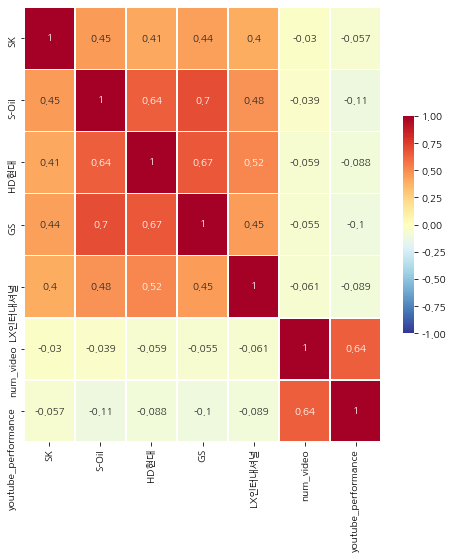

In [54]:
change_corr = youtube_change.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots(figsize=(8,8))

# 히트맵을 그린다
sns.heatmap(change_corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

**등락률의 경우 네 종목 모두 큰 상관관계가 없음**

**유튜브-종가 상관관계**

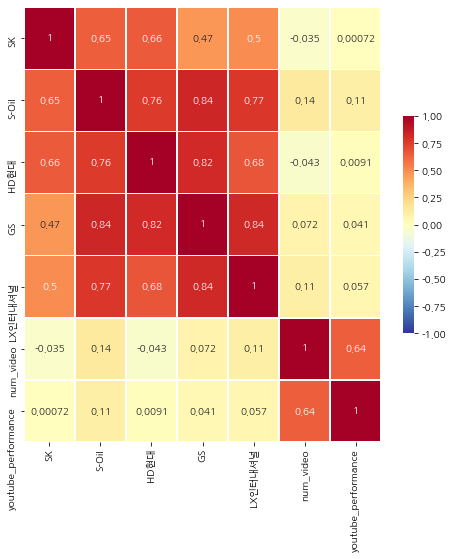

In [55]:
close_corr = youtube_close.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(8,8) )

# 히트맵을 그린다
sns.heatmap(close_corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

**종가의 경우 S-Oil, LX인터내셔널이 유튜브 영상 개수과 약간의 양의 상관관계가 있지만 그 정도가 크지 않음**

#### 유튜브-거래량 상관관계

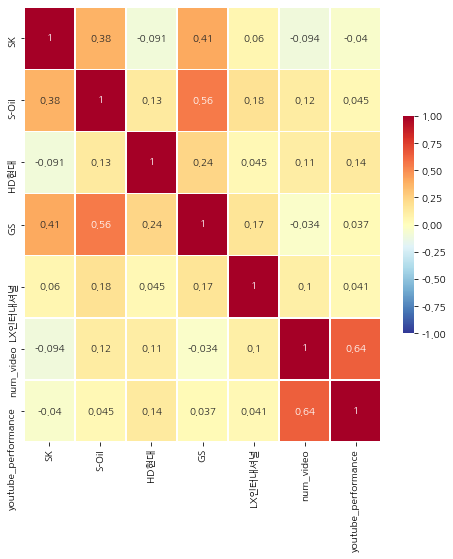

In [56]:
volume_corr = youtube_volume.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(8,8) )

# 히트맵을 그린다
sns.heatmap(volume_corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

**거래량의 경우 S-Oil는 영상 개수와, HD현대는 영상개수, 유튜브 반응과 약간의 양의 상관성이 있음**